In [1]:
## import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%matplotlib inline

In [2]:
## read dataset
df = pd.read_excel("msci_prices.xlsx")

## calculate returns
df["return"] = df["price"] / df["price"].shift() - 1

# drop first row
df = df.drop([0])

# drop prices column
df = df.drop(columns = ["price"])

# separate current year return to plot it individually below (outside nested for loop)
df1 = df[df["year"] == 2023]

# drop last row for current year
df = df.iloc[:-1]

# transform returns from decimals to percentages, as this is the format visible in the graph
df["return"] = df["return"] * 100

# check maximum and minimum returns for bins construction
print(max(df["return"]))
print(min(df["return"]))

# define bins to pool returns into larger classes
bins = [-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60]

# pool returns into bins
df["binned"] = pd.cut(df["return"], bins = bins)

# transform current year return from decimal to percentage
df1["return"] = df1["return"] * 100

# pool current year return into respective bin
df1["binned"] = pd.cut(df1["return"], bins = bins)

41.88970615142536
-40.712604184094424


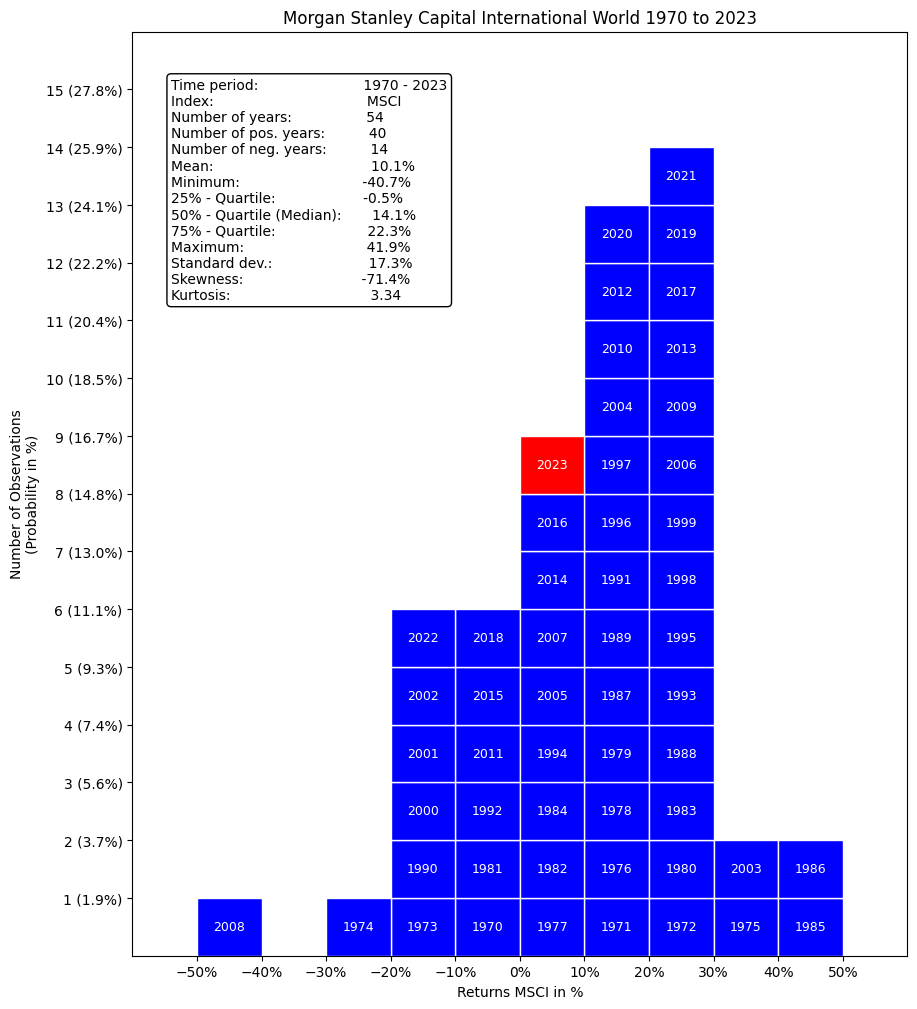

In [3]:
## plot the graph
fig, ax = plt.subplots()

# iterate for each bin
for j in range(len(df["binned"].unique())):
  # iterate for each return within the respective bin
  for i in range(len(df[df["binned"] == df["binned"].unique()[j]])):
    # create individual bars of width 10 and height 1 and stack them on top of the previously created one, using mean point to center the rectangle
    # (right + left / 2)
    p = ax.bar(x = (df["binned"].unique()[j].right + df["binned"].unique()[j].left) / 2,
               height = 1, bottom = i, width = 10, color = "b", edgecolor = "white")
    # add year to the respective rectangle, note the reset index to avoid the missing key error, since not placing it would return some j for which
    # no return is found, since the indexes would potentially jump from one number to another one, and everything turned into string and into list (array),
    # by nesting [str(..)]
    ax.bar_label(p, labels = [str(df["year"][df["binned"] == df["binned"].unique()[j]].reset_index(drop = True)[i])],
                 label_type = "center", color = "white", fontsize = 9)

## do the same process as above for current year
p = ax.bar(x = (df1["binned"].unique()[0].right + df1["binned"].unique()[0].left) / 2,
           height = 1, bottom = 8, width = 10, color = "red", edgecolor = "white")
ax.bar_label(p, labels = [str(df1["year"][df1["binned"] == df1["binned"].unique()[0]].reset_index(drop = True)[0])],
             label_type = "center", color = "white", fontsize = 9)

## set up text box
props = dict(boxstyle = "round", facecolor = "white", alpha = 1)

# fill text box with required information, most likely there is a less verbose way to write this, also this doesn't align values of variables to right
# automatically; define comb_rets to avoid pd.concat([..]) in every step to fix values for having separated current year in the first step
comb_rets = pd.concat([df["return"], df1["return"]])

# had to replace x.round(1) with round(x, 1) for mean, max, median etc. because even though it ran
# without problems on colab, it doesn't on pycharm, instead error: "float has not attribute round" pops up
ax.text(x = .05, y = .95, s = f"Time period:\t {df['year'].iloc[0]} - {df1['year'].iloc[-1]}\n".expandtabs(35) +
                              "Index:\t MSCI\n".expandtabs(40) +
                              f"Number of years:\t {len(df['return']) + len(df1['return'])}\n".expandtabs(16) +
                              f"Number of pos. years:\t {(df['return'][df['return'] >= 0]).count() + (df1['return'][df1['return'] >= 0]).count()}\n".expandtabs(10) +
                              f"Number of neg. years:\t {(df['return'][df['return'] < 0]).count() + (df1['return'][df1['return'] < 0]).count()}\n".expandtabs(10) +
                              f"Mean:\t {round(comb_rets.mean(), 1)}%\n".expandtabs(40) +
                              f"Minimum:\t {round(comb_rets.min(), 1)}%\n".expandtabs(35) +
                              f"25% - Quartile:\t {np.percentile(a = comb_rets, q = 25).round(1)}%\n".expandtabs(34) +
                              f"50% - Quartile (Median):\t {round(comb_rets.median(), 1)}%\n".expandtabs(10) +
                              f"75% - Quartile:\t {np.percentile(a = comb_rets, q = 75).round(1)}%\n".expandtabs(35) +
                              f"Maximum:\t {round(comb_rets.max(), 1)}%\n".expandtabs(35) +
                              f"Standard dev.:\t {round(comb_rets.std(), 1)}%\n".expandtabs(35) +
                              f"Skewness:\t {(comb_rets.skew() * 100).round(1)}%\n".expandtabs(35) +
                              f"Kurtosis:\t {(3 + comb_rets.kurt()).round(2)}".expandtabs(40), transform = ax.transAxes, fontsize = 10,
        verticalalignment = 'top', bbox = props)

## set x and y axes ranges and ticks to fit with the sample graph;
# yticks argument commented out because it's anyways overwritten by plt.yticks() below
ax.set(xlim = (-60, 60), xticks = np.arange(start = -50, stop = 60, step = 10),
       ylim = (0, 16))#, yticks = np.arange(start = 1, stop = 27, step = 1))

# transform x axis into percentage format, as required by sample graph
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

## set customized y ticks array to include amounts in percentages in parentheses
y_ticks = np.arange(start = 1, stop = 16, step = 1)
y_ticks_perc = np.arange(start = 1 / 54, stop = 16 / 54, step = 1 / 54)

y_ticks1 = []

for i in range(len(y_ticks)):
  y_ticks1.append(" ".join([str(y_ticks[i]), "(" + str((y_ticks_perc[i] * 100).round(1)) + "%" + ")"]))

# include customized y ticks as y axis labels, couldn't do this within ax.set() above
plt.yticks(ticks = np.arange(start = 1, stop = 16, step = 1), labels = y_ticks1)

# add title
plt.title("Morgan Stanley Capital International World 1970 to 2023")

# add y axis title
plt.ylabel("Number of Observations\n(Probability in %)")

# add x axis title
plt.xlabel("Returns MSCI in %")

# increase figure size to better visualize data
fig.set_figwidth(10)
fig.set_figheight(12)